<h2><center>Identify Causality by Difference in Differences</center></h2>

<h3>Why Do We Need DiD</h3>
https://medium.com/dataman-in-ai/identify-causality-by-difference-in-differences-78ad8335fb7c

You may be asked to show the causal relationship between two measures. You first attempt may be to set up a randomized controlled trials: a treatment group, a controlled group and test. But wait! There are many reasons that randomized Controlled Trials (RCT) are not feasible. For example, it is impossible to set up a treatment-and-control experiment for a historical event. What can we do?

The Difference-in-Differences will be a good choice. Instead of trying to design an impossible randomized controlled experiment, we need to change our approach. The past historical events can be viewed as rich collections of natural experiments, in which nature does the randomization for us. We can try to find the “natural experiment” to identify the impact of a policy. For example. An unexpected change in policy could be seen as “natural experiment”. In natural experiments, we need to identify which is the group affected by the policy change (“treatment”) and which is the group that is not affected (“control”). An appropriate setting for the control group will determine the quality of the evaluation.

The DiD design is a kind of a quasi-experimental design. The word quasi means seemingly, apparently but not really. A quasi-experiment design is similar to a randomized controlled trials but without the random assignments by the researcher (Cook & Campbell, 1979). In the “identify causality” series of articles, I present econometric techniques that identify causality. These articles cover the following techniques:

* Regression Discontinuity (see “Identify Causality by Regression Discontinuity”),

* Difference in differences (DiD)(see “Identify Causality by Difference in Differences”),

* Fixed-Effects Models (See “Identify Causality by Fixed-Effects Models”),

* Randomized Controlled Trial with Factorial Design (see “Design of Experiments for Your Change Management”).

In each article I present the applications in various fields so you see the formation of their problems. I then offer best practices, the sample code, and how to draw the conclusions.


<h3>What Is Difference in Differences (DiD)?</h3>

![DiD](https://miro.medium.com/max/1212/1*5mHmHpDaqYoWn5BqQ0a77w.png)

The idea behind DiD is simple. First, we compute the difference in the mean of the outcome between the two groups in the “Before” period, which is (A) in the above graph. Second, we compute the same for the “After” period, which is (B). Then we take the “second difference”, which is the difference between (A) and (B) and is labeled as (C). This second difference measures how the change in outcome differs between the two groups. The difference is attributed to the causal effect of the intervention.

Apparently the choice of the control group is critical in DiD. It behaves as the counterfactual or “what if” scenario. However, it is not so easy to find the control group and a researcher has to construct the counterfactual. Abadie et al. (2001; 2010) have proposed a method called the Synthetic Control method to guide researchers to construct the counterfactual. For the interest of readers, I have described briefly in the end of this article.


<h3>DiD Assumptions</h3>

DID has implicitly required the following assumptions. When you design the treatment and control groups, consider if they meet these assumptions:

Parallel trends: the treatment and control groups have parallel trends in the outcome. This means in the absence of the intervention, the difference between the treatment and control group is constant over time. The best way is to plot and visually inspect if the parallel trends hold.

No spillover effects.

The characteristics of the treatment and control groups are stable over the study period.


<h3>Difference-in-Differences Applications in Public Health</h3>

In 2011, the Accreditation Council for Graduate Medical Education (ACGME) restricted resident duty hour requirements, which was established back in 2003. This raises concerns about the impacts on patient care and resident training. How to conduct the test to prove there is an impact or no impact? Rajaram et al. (2014, JAMA) applied the DiD method and concluded the policy change does not impact a variety of measures including death or serious morbidity, postoperative complications, and resident examination performance in the post-reform period. For more applications in public health, here is a good resource.


<h3>Difference-in-Differences Applications in Economic Policy</h3>

Will higher minimum wage reduce employment? This question has practical policy implications. The conventional economic theory predicts a rise in the minimum wage leads employers to cut employment (George J. Stigler, 1946), but early empirical economic studies showed contradicting results (Richard A. Lester, 1960, 1964) or no impact (Krueger, 1992; Card, 1992; Stephen Machin and Alan Manning, 1994). The test for this question is hard. We can not go back to do a randomized controlled trial.

DiD provides an unbiased solution. Card and Krueger (1993) in their well-known study conclude the rise in the minimum wage shows no indication in reducing employment. Let’s see how they applied DiD in their study.

* They analyzed 410 fast-food restaurants in New Jersey and Pennsylvania following the increase in New Jersey’s minimum wage from $4.25 to $5.05 per hour.

* They compared full-time equivalent employment in New Jersey and Pennsylvania before and after the rise of the minimum wage.

* In this “natural experiment” the restaurants in New Jersey become the “treatment” group and those in Pennsylvania the controlled group.

* Check the parallel trend assumption: the unemployment rates of New Jersey and Pennsylvania show parallel trends over time.

* They applied the standard two-groups and two-time-periods DiD.

<h3>The Standard DiD — Two Groups & Two Time Periods</h3>
The dataset and analysis are credited to Constantin Colonescu’s “Principles of Econometrics with R”. I demonstrate the analysis in Python.

In [4]:
pip install pandas-profiling

     |████████████████████████████████| 248 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 7.2 MB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 8.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 9.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.6 MB 10.4 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 8.1 MB/s  eta 0:00:01
     |████████████████████████████████| 102 kB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 1.6 MB/s  eta 0:00:01
     |████████████████████████████████| 285 kB 12.4 MB/s eta 0:00:01
     |████████████████████████████████| 812 kB 13.9 MB/s eta 0:00:01
     |████████████████████████████████| 31.9 MB 5.9 MB/s eta 0:00:011
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27084 sha256=d5cfd0232afabcd95a4cf6681e2693ce0f6b4437703c2008ecc95b769c24ba79
  Stored in directory: /

In [18]:
! pip3 install --upgrade pip

     |████████████████████████████████| 1.5 MB 3.7 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.0.1
    Uninstalling pip-21.0.1:
      Successfully uninstalled pip-21.0.1


In [ ]:
! sudo pip3 install openpyxl --upgrade
! sudo pip3 install openpyxl_xlsx --upgrade
! sudo pip3 install pyexcel --upgrade

In [2]:
import pandas as pd
from pandas_profiling import ProfileReport
import statsmodels.formula.api as smf 
import statsmodels.api as sm  
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_excel('njmin3.xlsx')
df.head()

,CO_OWNED,SOUTHJ,CENTRALJ,PA1,PA2,DEMP,nj,bk,kfc,roys,wendys,d,d_nj,fte
0,0,0,1,0,0,12.00,1,1,0,0,0,0,0,15.00
1,0,0,1,0,0,6.50,1,1,0,0,0,0,0,15.00
2,0,0,1,0,0,-1.00,1,0,0,1,0,0,0,24.00
3,1,0,0,0,0,2.25,1,0,0,1,0,0,0,19.25
4,0,0,0,0,0,13.00,1,1,0,0,0,0,0,21.50


![DiD](https://miro.medium.com/max/373/1*KYTFAXUAWyPxoGmLd_zFUA.png)

In [4]:
model = smf.ols(formula = "fte ~ d_nj + kfc + roys + wendys + CO_OWNED + SOUTHJ + CENTRALJ + PA1", data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    fte   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     27.47
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           9.44e-38
Time:                        19:20:43   Log-Likelihood:                -2809.2
No. Observations:                 794   AIC:                             5636.
Df Residuals:                     785   BIC:                             5679.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.3532      0.601     40.549      0.0

The result shows “d_nj” is not statistically significant, meaning the minimum wage law has no impact on employment. In a DiD you can control for other covariates that may differ between the groups.


In [5]:
# NJ Before and after
NJ_before = df.loc[(df['nj']==1) & (df['d']!=1),'fte'].mean()
NJ_after  = df.loc[(df['nj']==1) & (df['d']==1),'fte'].mean()

# PA Before and after
PA_before = df.loc[(df['nj']!=1) & (df['d']!=1),'fte'].mean()
PA_after  = df.loc[(df['nj']!=1) & (df['d']==1),'fte'].mean()

# NJ counterfactual (if no treatment)
NJ_counterfactual = NJ_before + ( NJ_before - PA_before )

[NJ_before, NJ_after,
 PA_before,PA_after,
 NJ_before, NJ_counterfactual]

[20.439408099688475,
 21.02742946708464,
 23.33116883116883,
 21.165584415584416,
 20.439408099688475,
 17.547647368208118]

The above presents the FTE of NJ, PA and the counterfactual as 20.4, 21.0, 23.3, 21.1, 20.4, 17.5. We can plot the DiD like the following:

Text(0.5, 1.0, 'Difference-in-difference: Before and After')

<Figure size 320x240 with 0 Axes>

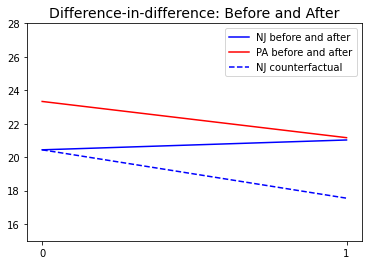

In [6]:
plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots()
lineNJ, = ax.plot(['0', '1'], [NJ_before, NJ_after],color='blue',label='NJ before and after')
linePA, = ax.plot(['0', '1'], [PA_before, PA_after],color = 'red',label = 'PA before and after')
lineNJ0, = ax.plot(['0', '1'], [NJ_before, NJ_counterfactual],color = 'blue',linestyle='dashed',label='NJ counterfactual')
ax.legend()
plt.ylim(15, 28)  
plt.title("Difference-in-difference: Before and After", fontsize="14")

<h3>Synthetic Methods to Construct the Control (Counterfactual) Group</h3>

We probably all agree political turmoils devastate economic prosperity. But how to assess the economic impact? The Basque Country was one of the richest regions in Spain in the early 1970s but dropped to the sixth in terms of GDP in the 1990s. In order to use DiD to assess the impact, we may take the Basque economy as the treatment group and the economy of the rest of Spain as the control group. However, the economy of Spain suffered an economic downturn in the 1970s and 1980s, at the peak of terrorist activity. Taking the rest of Spain as the control group is not the right control group.

What can we do? Abadie and Gardeazabal (2001) construct a combination of other Spanish regions as the “synthetic” control group. The regions of this control group resemble most of the economic characteristics of the Basque Country before the outset of the Basque political terrorism in the 1970s. The subsequent economic evolution of this “counterfactual” Basque Country without terrorism is compared to the actual experience of the Basque Country. They are able to conclude that, after the outbreak of terrorism, per capita GDP in the Basque Country declined about 10 percentage points relative to the synthetic control region. See the graph below.


![DiD](https://miro.medium.com/max/1174/1*ss8wT02lJgtwIHomShEMhw.png)